# Problem 2: German Credit Dataset (72 points)

In [39]:
#function to load csv file into pandas dataframe
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.colors import *
def load_csv(file_name):
    data1 = pd.read_csv(file_name)
    data = DataFrame(data1)
    return data
mainDataFrame = load_csv('GermanCredit.csv') #add the csv file name here
mainDataFrame

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


**Task 1 - Preprocessing**

1. [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)
2. [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.
3. [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.
4. [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').
5. [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'
6. [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [40]:
#function to replace 'none' with 'NaN'
def replace_none(data):
    data = data.replace(to_replace = 'none', value = np.nan)
    return data
#function to remove n number of columns with the highest number of 'none' entries
def drop_columns(data, n = 3):
    hold = pd.isnull(data).sum()
    #print(hold)
    return data.drop(hold.nlargest(n).index, axis = 1)


mainDataFrame = replace_none(mainDataFrame)
mainDataFrame = drop_columns(mainDataFrame)
mainDataFrame
    

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [41]:
#function to remove all apostrophes from the pandas dataframe
def remove_apostrophe(data):
    data.replace('\'','', regex=True, inplace=True) 
    return data
mainDataFrame = remove_apostrophe(mainDataFrame)
mainDataFrame



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [42]:
#function to change values in the 'checking_status' column
def change_checking_status(data):
    data.loc[data['checking_status'] == 'no checking', 'checking_status'] = 'No Checking'
    data.loc[data['checking_status'] == '<0', 'checking_status'] = 'Low'
    data.loc[data['checking_status'] == '0<=X<200', 'checking_status'] = 'Medium'
    data.loc[data['checking_status'] == '>=200', 'checking_status'] = 'High'
    return data
mainDataFrame = change_checking_status(mainDataFrame)
mainDataFrame


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [43]:
#function to change values in the 'savings_status' column, change the values from 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High
def change_savings_status(data):
    data.loc[data['savings_status'] == 'no known savings', 'savings_status'] = 'No Savings'
    data.loc[data['savings_status'] == '<100', 'savings_status'] = 'Low'
    data.loc[data['savings_status'] == '100<=X<500', 'savings_status'] = 'Medium'
    data.loc[data['savings_status'] == '500<=X<1000', 'savings_status'] = 'High'
    data.loc[data['savings_status'] == '>=1000', 'savings_status'] = 'High'
    return data
mainDataFrame = change_savings_status(mainDataFrame)
mainDataFrame


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,bad


In [44]:
#function to Change class column values from 'good' to '1' and 'bad' to '0'
def change_class(data):
    data.loc[data['class'] == 'good', 'class'] = '1'
    data.loc[data['class'] == 'bad', 'class'] = '0'
    return data
mainDataFrame = change_class(mainDataFrame)
mainDataFrame


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


In [45]:
#function to Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.
def change_employment(data):
    data.loc[data['employment'] == 'unemployed', 'employment'] = 'Unemployed'
    data.loc[data['employment'] == '<1', 'employment'] = 'Amateur'
    data.loc[data['employment'] == '1<=X<4', 'employment'] = 'Professional'
    data.loc[data['employment'] == '4<=X<7', 'employment'] = 'Experienced'
    data.loc[data['employment'] == '>=7', 'employment'] = 'Expert'
    return data
mainDataFrame = change_employment(mainDataFrame)
mainDataFrame


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,4,real estate,31,own,1,unskilled resident,1,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,4,life insurance,40,own,1,high qualif/self emp/mgmt,1,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,4,car,38,own,1,skilled,1,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,4,no known property,23,for free,1,skilled,1,yes,0


***Task 2 - Analysis*** 

1. [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2.
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab (Links to an external site.) function. Do this for the following two counts.

    a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).
    
    b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.

    
 

2. [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.
3. [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.
4. [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:
    
    Most common checking status: ...
    
    Most common savings status: ...


In [46]:
#function to get the count of each category of foreign workers yes and no, for each class of credit good and bad using the pandas cross tabulation function
def get_foreign_count(data):
    data = pd.crosstab(data['foreign_worker'], data['class'])
    return data
foreigncount = get_foreign_count(mainDataFrame)
foreigncount




class,0,1
foreign_worker,,
no,4,33
yes,296,667


In [47]:
#get the count of each category of employment for each category of saving_status using the pandas cross tabulation function
def get_employment_count(data):
    data = pd.crosstab(data['employment'], data['savings_status'])
    return data
employmentcount = get_employment_count(mainDataFrame)
employmentcount



savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


In [48]:
#function to find the average credit amount for single people who have experienced employment
def get_avg_credit_amount(data):
    data = data[data['personal_status'] == 'male single']
    data = data[data['employment'] == 'Experienced']
    #export data as csv file
    #data.to_csv('hello.csv')
    return data['credit_amount'].mean()
avg_credit_amount = get_avg_credit_amount(mainDataFrame)
avg_credit_amount

4142.592592592592

In [49]:
#function to find average 'duration' for each 'job' and store it in a dictionary with the job as the key and the average duration as the value
def get_avg_duration(data):
    data = data.groupby(['job'])['duration'].mean()
    return data
avg_duration = get_avg_duration(mainDataFrame)
avg_duration
    

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

In [50]:
#function that finds the most common checking_status and savings_status for the purpose 'education' and print the top saving_status and checking_status
def get_top_checking_savings(data):
    hold = data
    hold = hold[hold['purpose'] == 'education']
    hold = hold.groupby(['savings_status'])['savings_status'].count()
    hold = hold.sort_values(ascending = False)
    print('Most common savings status: ', hold.index[0])
    hold = data
    hold = hold[hold['purpose'] == 'education']
    hold = hold.groupby(['checking_status'])['checking_status'].count()
    hold = hold.sort_values(ascending = False)
    print('Most common checking status: ', hold.index[0])
    return 
get_top_checking_savings(mainDataFrame)




Most common savings status:  Low
Most common checking status:  No Checking


***Task 3 - Visualization***

1. [9 pts] Plot subplots of two histograms: one with savings_status on the x-axis and personal_status as different colors, and another with checking_status on the x-axis and personal_status as different colors.
2. [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).
3. [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:   a. Personal status    b. Credit history     c. Job

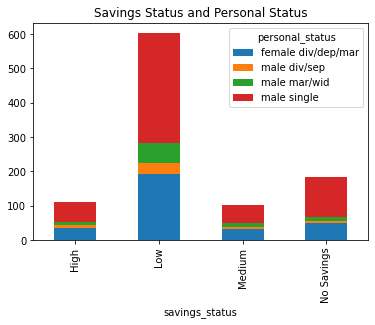

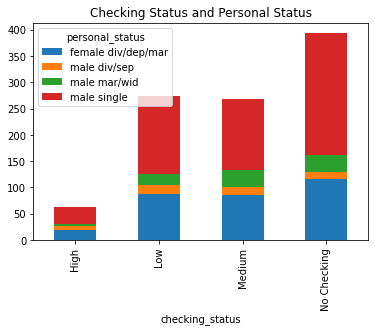

In [51]:
#function to plot a subplot of two histograms,
#one with savings_status on the x-axis and personal_status as different colors
#another with checking_status on the x-axis and personal_status as different colors
def plot_histogram(data):
    hold = data
    hold = hold.groupby(['savings_status', 'personal_status'])['savings_status'].count()
    hold = hold.unstack()
    hold.plot(kind = 'bar', stacked = True, legend = True, title = 'Savings Status and Personal Status')
    data = data.groupby(['checking_status', 'personal_status'])['checking_status'].count()
    data = data.unstack()
    data.plot(kind = 'bar', stacked = True, legend = True, title = 'Checking Status and Personal Status')
    plt.show()
    return
plot_histogram(mainDataFrame)


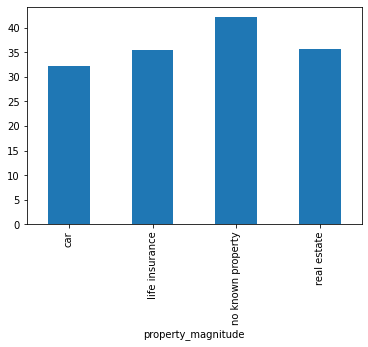

In [52]:
#For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).
def plot_bar_graph(data):
    data = data[data['credit_amount'] > 4000]
    data = data.groupby(['property_magnitude'])['age'].mean()
    data.plot(kind = 'bar')
    plt.show()
    return
plot_bar_graph(mainDataFrame)

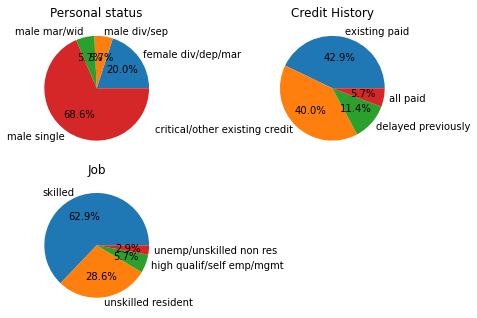

In [53]:
#function for people with a "High" savings_status and age above 40, use subplots to plot the following pie graphs:
#1.Personal status
#2.Credit History
#3.Job
def get_pie_graphs(data):
    hold = data
    hold = hold[hold['savings_status'] == 'High']
    hold = hold[hold['age'] > 40]
    hold = hold.groupby(['personal_status'])['personal_status'].count()
    #hold = hold.sort_values(ascending = False)
    plt.subplot(221)
    plt.pie(hold.values, labels = hold.index, autopct = '%1.1f%%')
    plt.title('Personal status')
    hold = data
    hold = hold[hold['savings_status'] == 'High']
    hold = hold[hold['age'] > 40]
    hold = hold.groupby(['credit_history'])['credit_history'].count()
    hold = hold.sort_values(ascending = False)
    plt.subplot(222)
    plt.pie(hold.values, labels = hold.index, autopct = '%1.1f%%')
    plt.title('Credit History')
    hold = data
    hold = hold[hold['savings_status'] == 'High']
    hold = hold[hold['age'] > 40]
    hold = hold.groupby(['job'])['job'].count()
    hold = hold.sort_values(ascending = False)
    plt.subplot(223)
    plt.pie(hold.values, labels = hold.index, autopct = '%1.1f%%')
    plt.title('Job')
    plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    plt.show()
    return
get_pie_graphs(mainDataFrame)



In [54]:
#write the panda dataframe to a csv file
def write_to_csv(data):
    data.to_csv('.csv')
    return
write_to_csv(mainDataFrame)